## Setup

In [146]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.preprocessing import MinMaxScaler


## Get the data

In [106]:
import os
import requests
import zipfile
import pandas as pd


url = "https://www.kaggle.com/api/v1/datasets/download/joebeachcapital/30000-spotify-songs"
zip_path = "spotify_songs.zip"
extract_path = "./datasets"
#create dataframe songs:


# Faz o download do arquivo zip
response = requests.get(url)
with open(zip_path, "wb") as file:
    file.write(response.content)
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

## Take a quick look at the dataset

In [107]:
csv_path = os.path.join(extract_path, "spotify_songs.csv")
songs = pd.read_csv(csv_path)
print(songs.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [108]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [109]:
pd.set_option('display.max_rows', None)
songs["playlist_genre"].value_counts()

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

### Mostrar nível de popularidade por gênero 

In [110]:
def popularityPerGenre(songs):
    # Agrupar por 'playlist_genre' e calcular a média da popularidade
    genre_popularity = songs.groupby("playlist_genre")["track_popularity"].mean()
    # Ordenar os resultados em ordem decrescente
    genre_popularity_sorted = genre_popularity.sort_values(ascending=False)
    # Exibir os gêneros com músicas mais populares
    print(genre_popularity_sorted)


In [111]:
# Ordenar as músicas pela popularidade em ordem decrescente
songs_sorted = songs.sort_values(by="track_popularity", ascending=False)
# Exibir apenas o nome das músicas, nome dos artistas e suas popularidades
(songs_sorted[["track_name", "track_popularity", "track_artist"]]).head(20)

track_name  track_popularity    track_artist
20091     Dance Monkey               100     Tones and I
1551      Dance Monkey               100     Tones and I
21468          ROXANNE                99  Arizona Zervas
20092          ROXANNE                99  Arizona Zervas
23104          ROXANNE                99  Arizona Zervas
30202          ROXANNE                99  Arizona Zervas
9018           The Box                98     Roddy Ricch
1301           Circles                98     Post Malone
18308         Memories                98        Maroon 5
18307  Blinding Lights                98      The Weeknd
1300          Memories                98        Maroon 5
11113             Tusa                98         KAROL G
716    Blinding Lights                98      The Weeknd
20252             Tusa                98         KAROL G
19740          Circles                98     Post Malone
18299          The Box                98     Roddy Ricch
23100          The Box                98     Roddy Ricch
19715  Blinding Lights                98      The Weeknd
23103             Tusa                98         KAROL G
21542         Memories                98        Maroon 5

In [112]:
songs.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

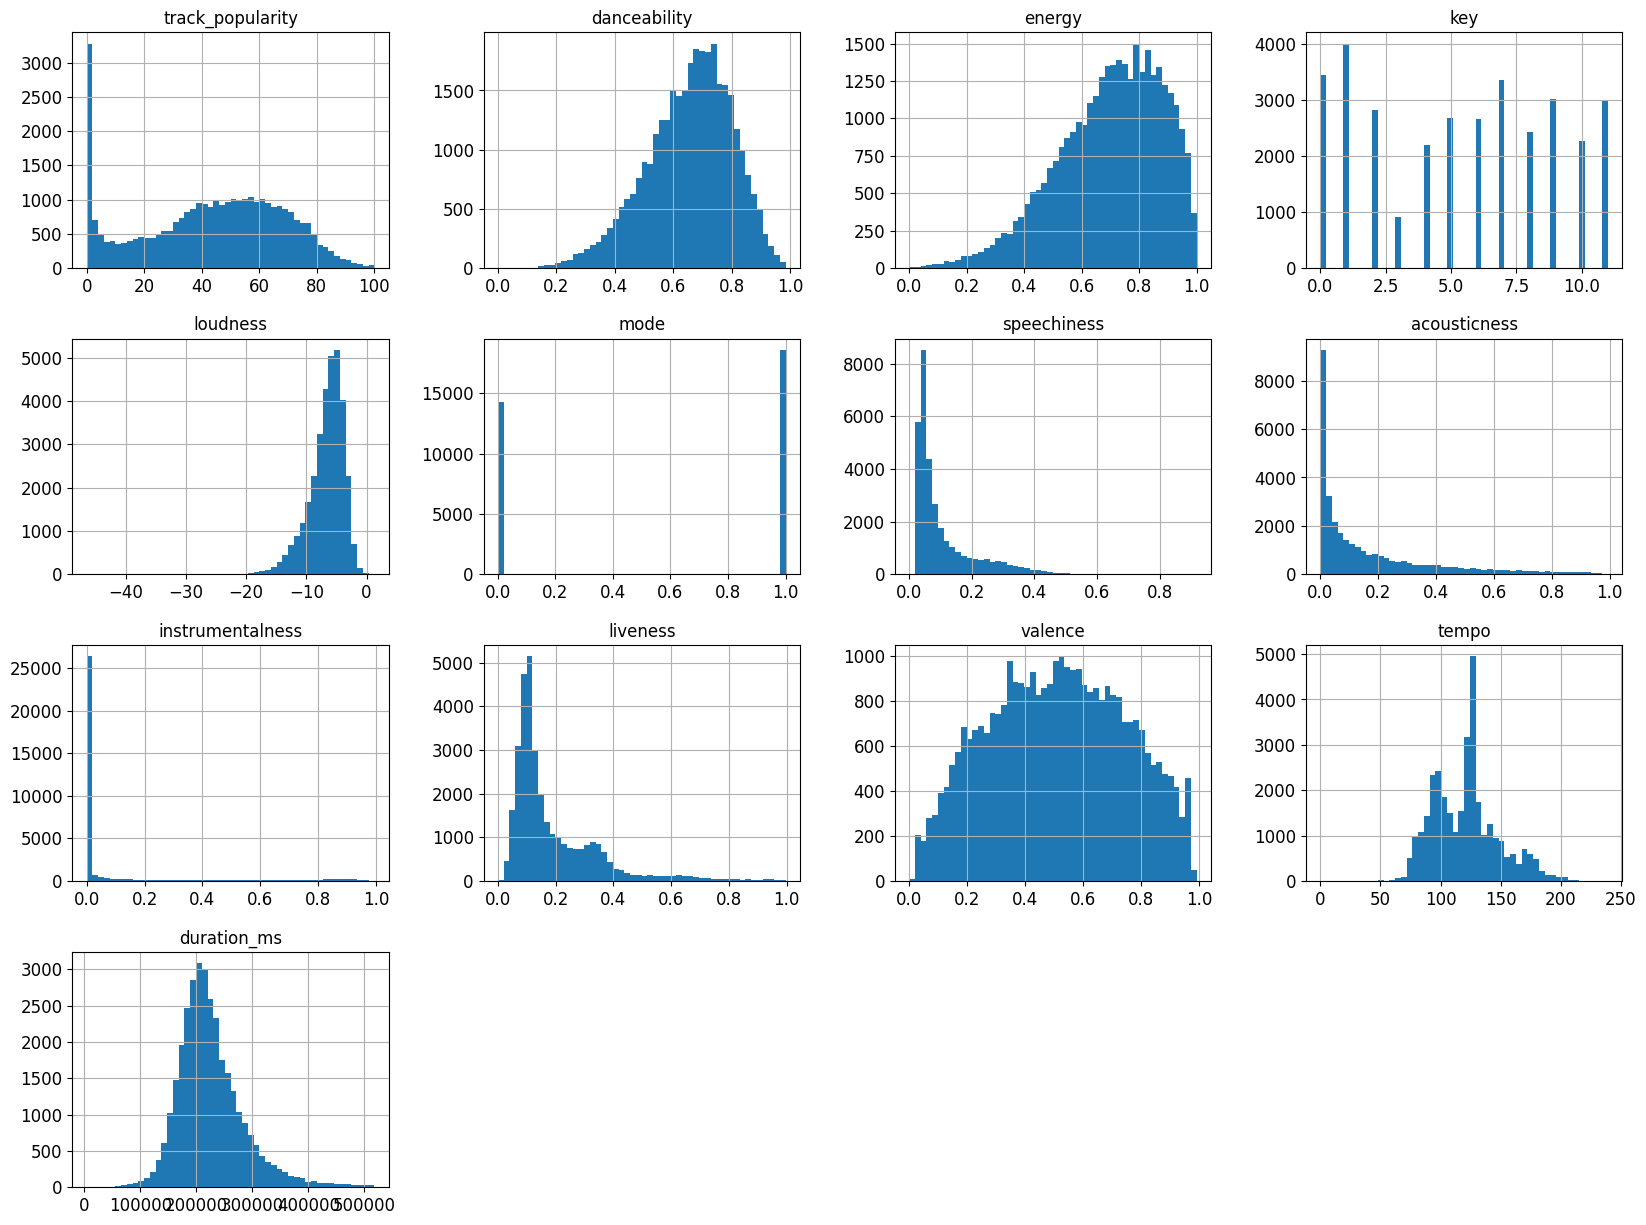

In [113]:
import matplotlib.pyplot as plt
songs.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Set Test

In [114]:
#to make this notebook's output identical at every run
np.random.seed(42)

In [115]:
import numpy as np# Use train_test_split to split the data into a training set and a test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(songs, test_size=0.2, random_state=42)
len(train_set)

26266

In [116]:
len(test_set)

6567

## Criar uma cópia do conjunto de treino

In [117]:
songs_cp = songs.copy()

## Creating functions to clean a dataset

### Retirar músicas duplicadas

In [118]:
def removeDuplicates(df):
    # Adiciona uma coluna auxiliar com o nome da música em lowercase
    df['track_name_lower'] = df['track_name'].str.lower()
    # Remove duplicadas usando a coluna auxiliar
    df_unique = df.drop_duplicates(subset=['track_artist', 'track_name_lower'])
    # Remove a coluna auxiliar antes de retornar
    df_unique = df_unique.drop(columns=['track_name_lower'])
    return df_unique


In [119]:
len(removeDuplicates(songs_cp))


26161

### OneHot para os artistas mais relevantes do dataset

In [120]:
#Já que o dataset possue uma quantidade consideravel de artistas, faz o Onehot apenas
#dos artistas mais populares
def onehotTopArtists(df, n, alpha=5):
    # Verifica se as colunas necessárias existem no DataFrame
    if 'track_artist' not in df.columns or 'track_popularity' not in df.columns:
        raise ValueError("O dataset deve conter as colunas 'track_artist' e 'track_popularity'.")
    # Calcula a popularidade total por artista
    artist_total_popularity = df.groupby('track_artist')['track_popularity'].sum()
    # Conta o número de músicas por artista
    artist_song_count = df.groupby('track_artist').size()
    # Ajuste da popularidade considerando o número de músicas com o parâmetro de suavização alpha
    artist_adjusted_popularity = artist_total_popularity / (artist_song_count + alpha)
    # Seleciona os `n` artistas mais populares com a popularidade ajustada
    top_artists = artist_adjusted_popularity.sort_values(ascending=False).head(n).index.tolist()
    print("Top artistas:", top_artists)  # Verifique os artistas mais populares
    # Cria colunas one-hot para esses `n` artistas mais populares
    for artist in top_artists:
        df[f"artist_{artist}"] = (df['track_artist'] == artist).astype(int)

    return df

### Removendo dados duplicados no dataset

In [121]:
#remove as musicas repetidas de acordo com as colunas track_artist e track_name
def removeDuplicates(df):
    # Adiciona uma coluna auxiliar com o nome da música em lowercase
    df['track_name_lower'] = df['track_name'].str.lower()
    # Remove duplicatas usando a coluna auxiliar
    df_unique = df.drop_duplicates(subset=['track_artist', 'track_name_lower'])
    # Remove a coluna auxiliar antes de retornar
    df_unique = df_unique.drop(columns=['track_name_lower'])
    return df_unique

### Remoção de colunas desnecessarias para a predição do modelo

In [122]:
#Remove uma lista de colunas de um dataset
def removeColumns(df, columns_name):
    return df.drop(columns=columns_name)

### Remoção de linhas que possuem algum dado em branco e que não pode ser obtido atraves de outros dados

In [123]:
#Remove linhas que possuam alguma informação relevante em branco
#Utilize depois de remover as colunas que não seram necessarias para a predição do modelo
def dropRowsEmpty(df):
  return df.dropna()

### Normalizar os dados numericos

In [124]:
#normaliza os dados em um intervalo de 0 a 1
def normalizeColumns(df,columns_name):
    scaler = MinMaxScaler()
    df[columns_name] = scaler.fit_transform(df[columns_name])
    return df

### Realizar Onehot para as variaveis categoricas que possuem um numero pequeno de valores

In [125]:
#faz Onehot para variaveis categoricas com um numero pequeno de categorias
def onehotEncode(df, columns):
    return pd.get_dummies(df, columns=columns, prefix=columns)

### Retorna todos os artistas e suas respectivas popularidades

In [126]:
#retorna todos os artistas e suas respectivas popularidade
def getArtistsAndPopularity(df, alpha=5):
    # Verifica se as colunas necessárias existem no DataFrame
    if 'track_artist' not in df.columns or 'track_popularity' not in df.columns:
        raise ValueError("O dataset deve conter as colunas 'track_artist' e 'track_popularity'.")
    # Calcula a popularidade total por artista
    artist_total_popularity = df.groupby('track_artist')['track_popularity'].sum()
    # Conta o número de músicas por artista
    artist_song_count = df.groupby('track_artist').size()
    # Calcula a popularidade ponderada para cada artista
    artist_weighted_popularity = artist_total_popularity / (artist_song_count + alpha)
    # Ordena os artistas pela popularidade ponderada em ordem decrescente
    artist_weighted_popularity_sorted = artist_weighted_popularity.sort_values(ascending=False)
    # Retorna o DataFrame com o nome do artista e sua popularidade
    return artist_weighted_popularity_sorted.reset_index()

### Retorna as n musicas mais populares do dataset

In [127]:
#retorna as n musicas mais populares do dataset
def getTopSongs(df,n):
  return df[['track_name', 'track_popularity']].sort_values(by='track_popularity', ascending=False).head(n)


### Funções de transformação para datas

In [128]:
### Função que retorna quantidade de músicas que não possuem mês de lançamento


def qtd_musicas_sem_mes(songs: pd.DataFrame) -> int:
    # Filtra as linhas onde a data de lançamento tem apenas o ano (4 caracteres)
    df_alterado = songs[songs['track_album_release_date'].str.len() == 4]
    
    # Contar o número de linhas que possuem apenas o ano
    n_linhas = df_alterado.shape[0]
    
    # Exibir o resultado
    print(f"Quantidade de músicas sem mês de lançamento: {n_linhas}")


qtd_musicas_sem_mes(songs)


Quantidade de músicas sem mês de lançamento: 1855


In [129]:
def preencher_mes_para_ano_unico_inplace(songs: pd.DataFrame) -> None:
    # Filtrar as linhas onde a data de lançamento tem apenas o ano (4 caracteres)
    df_ano_apenas = songs[songs['track_album_release_date'].str.len() == 4].copy()

    # Filtrar as linhas onde a data de lançamento tem o formato completo (ano-mês-dia)
    df_completo = songs[songs['track_album_release_date'].str.len() == 10].copy()

    # Extrair o mês das músicas com ano-mês-dia
    df_completo['month'] = df_completo['track_album_release_date'].str[5:7]

    # Contar a frequência de cada mês
    month_counts = df_completo['month'].value_counts()

    # Agora vamos preencher os meses nas músicas com ano apenas, de forma proporcional
    # Criação de uma lista que vai armazenar os meses a serem atribuídos
    months_to_fill = []

    # Para cada mês na distribuição, vamos adicionar o mês de forma proporcional
    for month, count in month_counts.items():
        months_to_fill.extend([month] * count)

    # Para as músicas faltando mês, vamos preencher com base na lista 'months_to_fill'
    df_ano_apenas['month'] = np.random.choice(months_to_fill, size=len(df_ano_apenas))

    # Agora vamos juntar os dois DataFrames (completo e preenchido) novamente
    # Garantindo que estamos mantendo todas as colunas, não apenas 'track_album_release_date'
    df_completo['month'] = df_completo['month']  # As músicas já completas não devem ser modificadas
    df_ano_apenas['track_album_release_date'] = df_ano_apenas['track_album_release_date'] + '-' + df_ano_apenas['month'] + '-01'

    # Substituir as linhas no DataFrame original
    songs.update(df_completo)  # Atualiza as músicas completas
    songs.update(df_ano_apenas)  # Atualiza as músicas com ano apenas

### Retorna o dataframe com a decomposição da 'track_album_release_date' em 'track_year' e 'track_month'

In [130]:
def decompositionDateTransform(df, date_column):
    # Como o ano é composto de 4 dígitos, iremos extrair os 4 primeiros caracteres da coluna
    def get_year(date):
        if isinstance(date, str) and len(date) >= 4 and date[:4].isdigit():
            return int(date[:4])
        return None

    # Depois dos 4 caracteres teremos um '-' que faz a divisão do ano e mês, iremos fazer
    # split e pegaremos os dois próximos dígitos
    def get_month(date):
        if isinstance(date, str) and len(date) >= 7:
            parts = date.split('-')
            if len(parts) > 1 and parts[1].isdigit():
                return f"{int(parts[1]):02d}"  # Garantir dois dígitos no mês
        return None

    # Agora adicionamos as novas colunas
    df['track_year'] = df[date_column].apply(get_year)
    df['track_month'] = df[date_column].apply(get_month)

    return df

### Retorna o dataframe com a classificação da 'duration_ms' em 0,1,2,3,4,5 e 6, na coluna 'track_duration_classification'

In [131]:
def classifyDuration(df, millis_column):
    def classify(millis):
        if isinstance(millis, (int, float)) and millis >= 0:
            duration_minutes = millis / 60000
            if duration_minutes == 0:
                return 0
            elif duration_minutes <= 1:
                return 1
            elif duration_minutes <= 2:
                return 2
            elif duration_minutes <= 3:
                return 3
            elif duration_minutes <= 4:
                return 4
            elif duration_minutes <= 5:
                return 5
            else:
                return 6
        return None

    df['track_duration_classification'] = df[millis_column].apply(classify)

    return df

### Retorna os dados discretizados e possiveis Outliers

In [132]:
def discretizeAndPossibleOutliers(data, n_bins=10, metodo='quantis'):
    if metodo == 'quantis':
        # Discretização baseada em quantis (divide os dados em n_bins intervalos com número igual de dados)
        bins = np.percentile(data, np.linspace(0, 100, n_bins+1))
        labels = [f'Intervalo {i+1}' for i in range(n_bins)]
        data_discretizada = pd.cut(data, bins=bins, labels=labels, include_lowest=True)
    elif metodo == 'igual':
        # Discretização por intervalos iguais (divide os dados em n_bins intervalos de tamanho igual)
        bins = np.linspace(data.min(), data.max(), n_bins+1)
        labels = [f'Intervalo {i+1}' for i in range(n_bins)]
        data_discretizada = pd.cut(data, bins=bins, labels=labels, include_lowest=True)
    else:
        raise ValueError("ERROR: 'quantis' ou 'igual'.")

    # Visualizar os dados discretizados
    sns.histplot(data_discretizada, kde=False, discrete=True, color='skyblue')
    plt.title('Distribuição dos Dados Discretizados')
    plt.xlabel('I')
    plt.ylabel('C')
    plt.show()

    # Identificar outliers (valores fora de 1.5 vezes o intervalo interquartil)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

    return data_discretizada, outliers

In [133]:
songs_cp.sort_values(by="track_popularity", ascending=False)[["track_name", "track_popularity", "track_artist"]].head(20)

track_name  track_popularity    track_artist
20091     Dance Monkey               100     Tones and I
1551      Dance Monkey               100     Tones and I
21468          ROXANNE                99  Arizona Zervas
20092          ROXANNE                99  Arizona Zervas
23104          ROXANNE                99  Arizona Zervas
30202          ROXANNE                99  Arizona Zervas
9018           The Box                98     Roddy Ricch
1301           Circles                98     Post Malone
18308         Memories                98        Maroon 5
18307  Blinding Lights                98      The Weeknd
1300          Memories                98        Maroon 5
11113             Tusa                98         KAROL G
716    Blinding Lights                98      The Weeknd
20252             Tusa                98         KAROL G
19740          Circles                98     Post Malone
18299          The Box                98     Roddy Ricch
23100          The Box                98     Roddy Ricch
19715  Blinding Lights                98      The Weeknd
23103             Tusa                98         KAROL G
21542         Memories                98        Maroon 5

## Verificar datas

In [134]:
import pandas as pd

# Converter a coluna para datetime (caso ainda não esteja)
#songs_cp['track_album_release_date'] = pd.to_datetime(songs_cp['track_album_release_date'], errors='coerce')

# Verificar se houve conversão inválida (NaT)
print("Datas inválidas:", songs_cp['track_album_release_date'].isna().sum())

# Localizar o índice da linha com a data mais recente (max)
idx_mais_recente = songs_cp['track_album_release_date'].idxmax()
idx_menos_recente = songs_cp['track_album_release_date'].idxmin()

# Acessar a linha correspondente
musica_mais_recente = songs_cp.loc[idx_mais_recente]
musica_menos_recente = songs_cp.loc[idx_menos_recente]

print("Música mais recente do dataset:")
print(f"Música: {musica_mais_recente['track_name']} - Data: {musica_mais_recente['track_album_release_date']}")

print("\nMúsica menos recente do dataset:")
print(f"Música: {musica_menos_recente['track_name']} - Data: {musica_menos_recente['track_album_release_date']}")



Datas inválidas: 0
Música mais recente do dataset:
Música: 別世界 - Data: 2020-01-29

Música menos recente do dataset:
Música: Mess Around - Data: 1957-01-01


## Verificar linhas nulas/NaN

In [135]:
import pandas as pd

# Mostra todas as colunas que têm pelo menos um valor NaN
colunas_com_nan = songs_cp.columns[songs_cp.isna().any()].tolist()
print("Colunas com valores nulos/NaN:", colunas_com_nan)

# Quantos valores nulos cada coluna tem:
valores_nulos_por_coluna = songs_cp.isna().sum()
print("\nQuantidade de valores nulos por coluna:")
print(valores_nulos_por_coluna)

# Exibir amostras das linhas com NaN para cada coluna identificada
for col in colunas_com_nan:
    print(f"\n=== Amostra de linhas com valores nulos em '{col}' ===")
    linhas_com_nan = songs_cp[songs_cp[col].isna()]
    display(linhas_com_nan.head())  # mostra as 5 primeiras linhas que têm NaN nessa coluna


Colunas com valores nulos/NaN: ['track_name', 'track_artist', 'track_album_name', 'track_name_lower']

Quantidade de valores nulos por coluna:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
track_name_lower            5
dtype: int64

=== Amostra de linhas com valores nulos em 'track_name' ===


track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  ...  \
8151              HIP&HOP  5DyJsJZOpMJh34WvUrQzMV            rap  ...   
9282          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...   
9283          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...   
19568  Reggaeton viejito🔥  0si5tw70PIgPkY1Eva6V8f          latin  ...   
19811       latin hip hop  3nH8aytdqNeRbcRCg3dw9q          latin  ...   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
8151    -7.635     1       0.1760        0.0410           0.00000    0.1160   
9282    -5.364     0       0.3190        0.0534           0.00000    0.5530   
9283    -5.907     0       0.3070        0.0963           0.00000    0.0888   
19568   -6.075     0       0.0366        0.0606           0.00653    0.1030   
19811   -7.635     1       0.1760        0.0410           0.00000    0.1160   

       valence    tempo  duration_ms  track_name_lower  
8151     0.649   95.999       282707               NaN  
9282     0.191  146.153       202235               NaN  
9283     0.505   86.839       206465               NaN  
19568    0.726   97.017       252773               NaN  
19811    0.649   95.999       282707               NaN  

[5 rows x 24 columns]


=== Amostra de linhas com valores nulos em 'track_artist' ===


track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  ...  \
8151              HIP&HOP  5DyJsJZOpMJh34WvUrQzMV            rap  ...   
9282          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...   
9283          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...   
19568  Reggaeton viejito🔥  0si5tw70PIgPkY1Eva6V8f          latin  ...   
19811       latin hip hop  3nH8aytdqNeRbcRCg3dw9q          latin  ...   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
8151    -7.635     1       0.1760        0.0410           0.00000    0.1160   
9282    -5.364     0       0.3190        0.0534           0.00000    0.5530   
9283    -5.907     0       0.3070        0.0963           0.00000    0.0888   
19568   -6.075     0       0.0366        0.0606           0.00653    0.1030   
19811   -7.635     1       0.1760        0.0410           0.00000    0.1160   

       valence    tempo  duration_ms  track_name_lower  
8151     0.649   95.999       282707               NaN  
9282     0.191  146.153       202235               NaN  
9283     0.505   86.839       206465               NaN  
19568    0.726   97.017       252773               NaN  
19811    0.649   95.999       282707               NaN  

[5 rows x 24 columns]


=== Amostra de linhas com valores nulos em 'track_album_name' ===


track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  ...  \
8151              HIP&HOP  5DyJsJZOpMJh34WvUrQzMV            rap  ...   
9282          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...   
9283          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...   
19568  Reggaeton viejito🔥  0si5tw70PIgPkY1Eva6V8f          latin  ...   
19811       latin hip hop  3nH8aytdqNeRbcRCg3dw9q          latin  ...   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
8151    -7.635     1       0.1760        0.0410           0.00000    0.1160   
9282    -5.364     0       0.3190        0.0534           0.00000    0.5530   
9283    -5.907     0       0.3070        0.0963           0.00000    0.0888   
19568   -6.075     0       0.0366        0.0606           0.00653    0.1030   
19811   -7.635     1       0.1760        0.0410           0.00000    0.1160   

       valence    tempo  duration_ms  track_name_lower  
8151     0.649   95.999       282707               NaN  
9282     0.191  146.153       202235               NaN  
9283     0.505   86.839       206465               NaN  
19568    0.726   97.017       252773               NaN  
19811    0.649   95.999       282707               NaN  

[5 rows x 24 columns]


=== Amostra de linhas com valores nulos em 'track_name_lower' ===


track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  ...  \
8151              HIP&HOP  5DyJsJZOpMJh34WvUrQzMV            rap  ...   
9282          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...   
9283          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...   
19568  Reggaeton viejito🔥  0si5tw70PIgPkY1Eva6V8f          latin  ...   
19811       latin hip hop  3nH8aytdqNeRbcRCg3dw9q          latin  ...   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
8151    -7.635     1       0.1760        0.0410           0.00000    0.1160   
9282    -5.364     0       0.3190        0.0534           0.00000    0.5530   
9283    -5.907     0       0.3070        0.0963           0.00000    0.0888   
19568   -6.075     0       0.0366        0.0606           0.00653    0.1030   
19811   -7.635     1       0.1760        0.0410           0.00000    0.1160   

       valence    tempo  duration_ms  track_name_lower  
8151     0.649   95.999       282707               NaN  
9282     0.191  146.153       202235               NaN  
9283     0.505   86.839       206465               NaN  
19568    0.726   97.017       252773               NaN  
19811    0.649   95.999       282707               NaN  

[5 rows x 24 columns]

In [136]:
# Mostrar sample de datas nulas no dataset
songs_cp[songs_cp["track_name"].isna()].sample(0)


Empty DataFrame
Columns: [track_id, track_name, track_artist, track_popularity, track_album_id, track_album_name, track_album_release_date, playlist_name, playlist_id, playlist_genre, playlist_subgenre, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, track_name_lower]
Index: []

[0 rows x 24 columns]

In [137]:
#mostrar todas as colunas através de um ID
songs_cp.loc[songs_cp["track_id"] == "6syPPxFX5QgjxHARzThygJ"]

track_id track_name  track_artist  track_popularity  \
11427  6syPPxFX5QgjxHARzThygJ   貴方しか見えない  Junko Ohashi                17   

               track_album_id                track_album_name  \
11427  10BIzys0QO4l9UQGay0iRI  THE BEST SONGS of JUNKO OHASHI   

      track_album_release_date          playlist_name             playlist_id  \
11427                     1998  City Pop 1985 シティーポップ  3j2osvmecEao5nmo9jZ5df   

      playlist_genre  ... loudness  mode  speechiness  acousticness  \
11427           rock  ...   -6.786     0       0.0356         0.157   

       instrumentalness  liveness  valence   tempo  duration_ms  \
11427          0.000061     0.109    0.128  80.354       292240   

       track_name_lower  
11427          貴方しか見えない  

[1 rows x 24 columns]

## Função para remover linhas com valores nulos

In [138]:

def remover_linhas_nulas(songs_cp):
    """
    Remove todas as linhas do DataFrame 'songs_cp' que contenham 
    pelo menos um valor nulo (NaN).
    Retorna um novo DataFrame sem linhas nulas.
    """
    songs_cp_sem_nulos = songs_cp.dropna(axis=0, how='any')
    return songs_cp_sem_nulos


In [139]:
songs_cp_sem_nulos = remover_linhas_nulas(songs_cp)
valores_nulos_por_coluna = songs_cp_sem_nulos.isna().sum()
print("\nQuantidade de valores nulos por coluna:")
songs_cp = songs_cp_sem_nulos
print(valores_nulos_por_coluna)


Quantidade de valores nulos por coluna:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
track_name_lower            0
dtype: int64


## Visualizando os dados

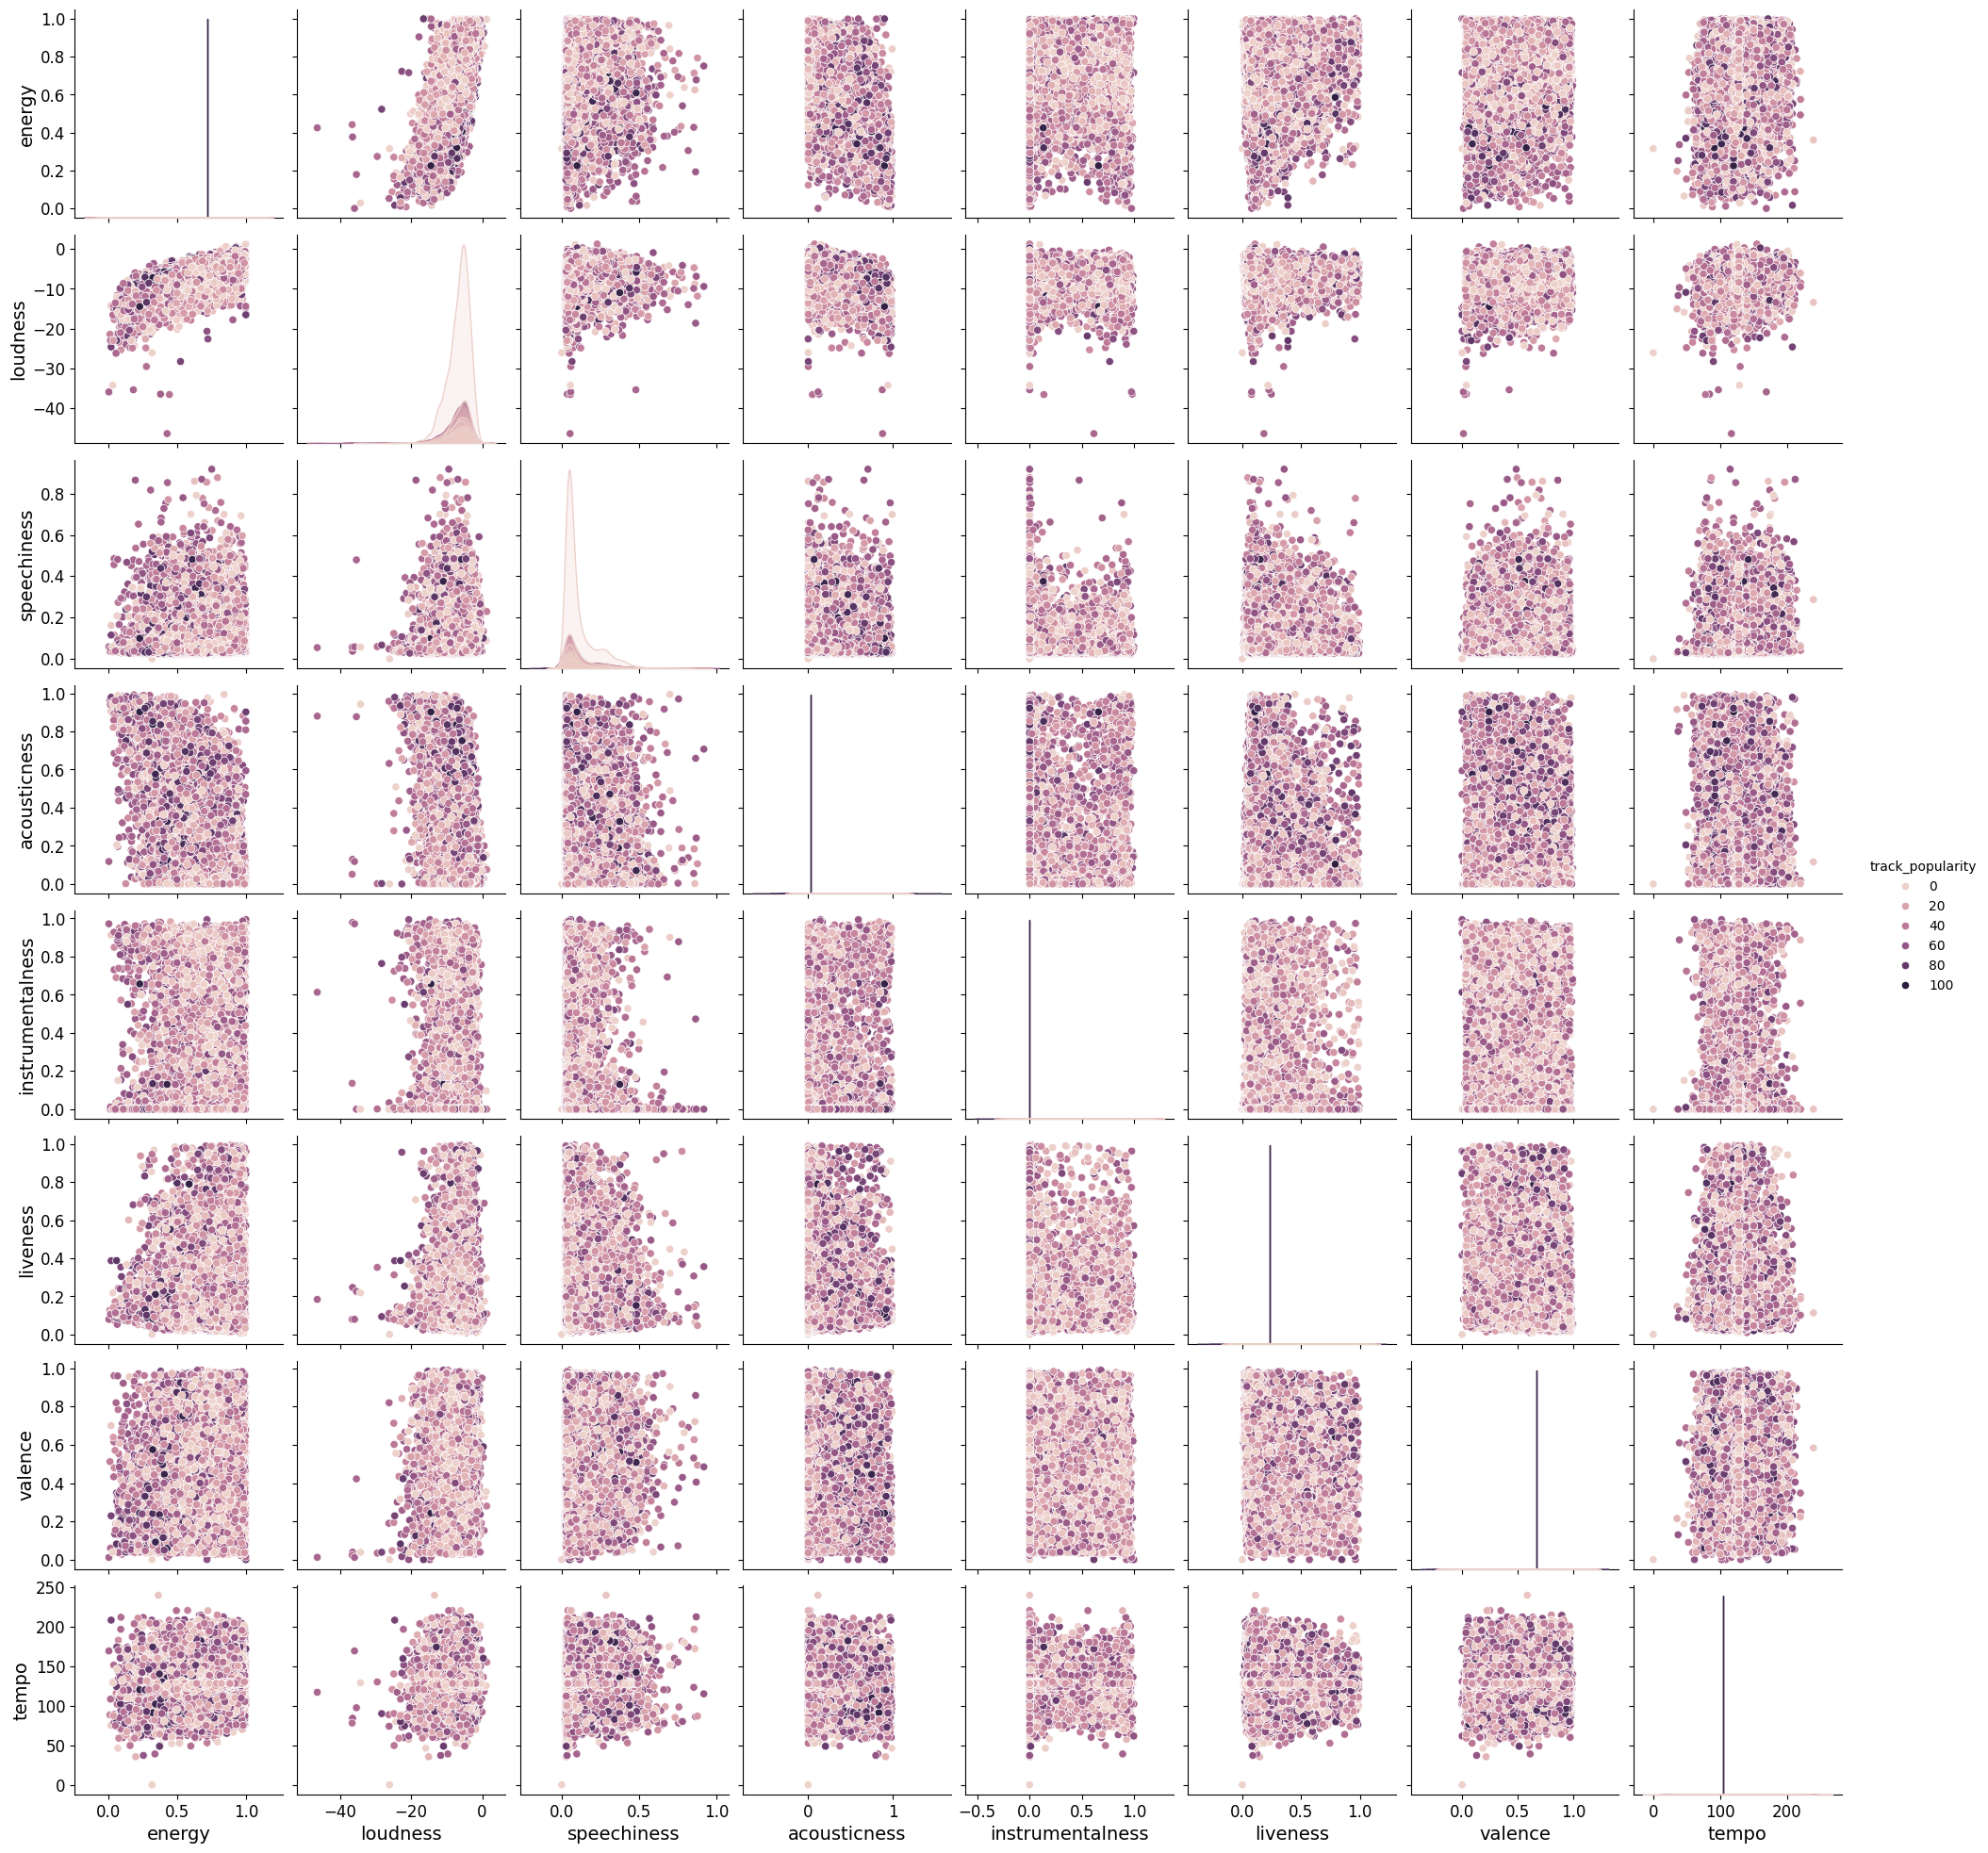

In [140]:
import seaborn as sns
sns.pairplot(songs_cp, vars=[ "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"], 
             hue="track_popularity")  # Por exemplo, colorindo por gênero


## Buscando correlações

In [141]:
# Se seu DataFrame é 'songs_cp', selecione apenas colunas numéricas
songs_cp_numeric = songs_cp.select_dtypes(include=['int64', 'float64'])

# Agora calcule a matriz de correlação apenas com colunas numéricas
corr_matrix = songs_cp_numeric.corr()

# Se quiser ver a correlação de uma coluna específica, substitua "alguma_coluna"
# por um nome de coluna que seja numérica
corr_matrix["track_popularity"].sort_values(ascending=False)


track_popularity    1.000000
acousticness        0.085042
danceability        0.064754
loudness            0.057717
valence             0.033278
mode                0.010553
speechiness         0.007067
key                -0.000405
tempo              -0.005538
liveness           -0.054593
energy             -0.108984
duration_ms        -0.143634
instrumentalness   -0.150003
Name: track_popularity, dtype: float64

array([[<Axes: xlabel='track_popularity', ylabel='track_popularity'>,
        <Axes: xlabel='danceability', ylabel='track_popularity'>,
        <Axes: xlabel='energy', ylabel='track_popularity'>,
        <Axes: xlabel='loudness', ylabel='track_popularity'>,
        <Axes: xlabel='acousticness', ylabel='track_popularity'>,
        <Axes: xlabel='instrumentalness', ylabel='track_popularity'>,
        <Axes: xlabel='liveness', ylabel='track_popularity'>,
        <Axes: xlabel='duration_ms', ylabel='track_popularity'>],
       [<Axes: xlabel='track_popularity', ylabel='danceability'>,
        <Axes: xlabel='danceability', ylabel='danceability'>,
        <Axes: xlabel='energy', ylabel='danceability'>,
        <Axes: xlabel='loudness', ylabel='danceability'>,
        <Axes: xlabel='acousticness', ylabel='danceability'>,
        <Axes: xlabel='instrumentalness', ylabel='danceability'>,
        <Axes: xlabel='liveness', ylabel='danceability'>,
        <Axes: xlabel='duration_ms', ylabel='dance

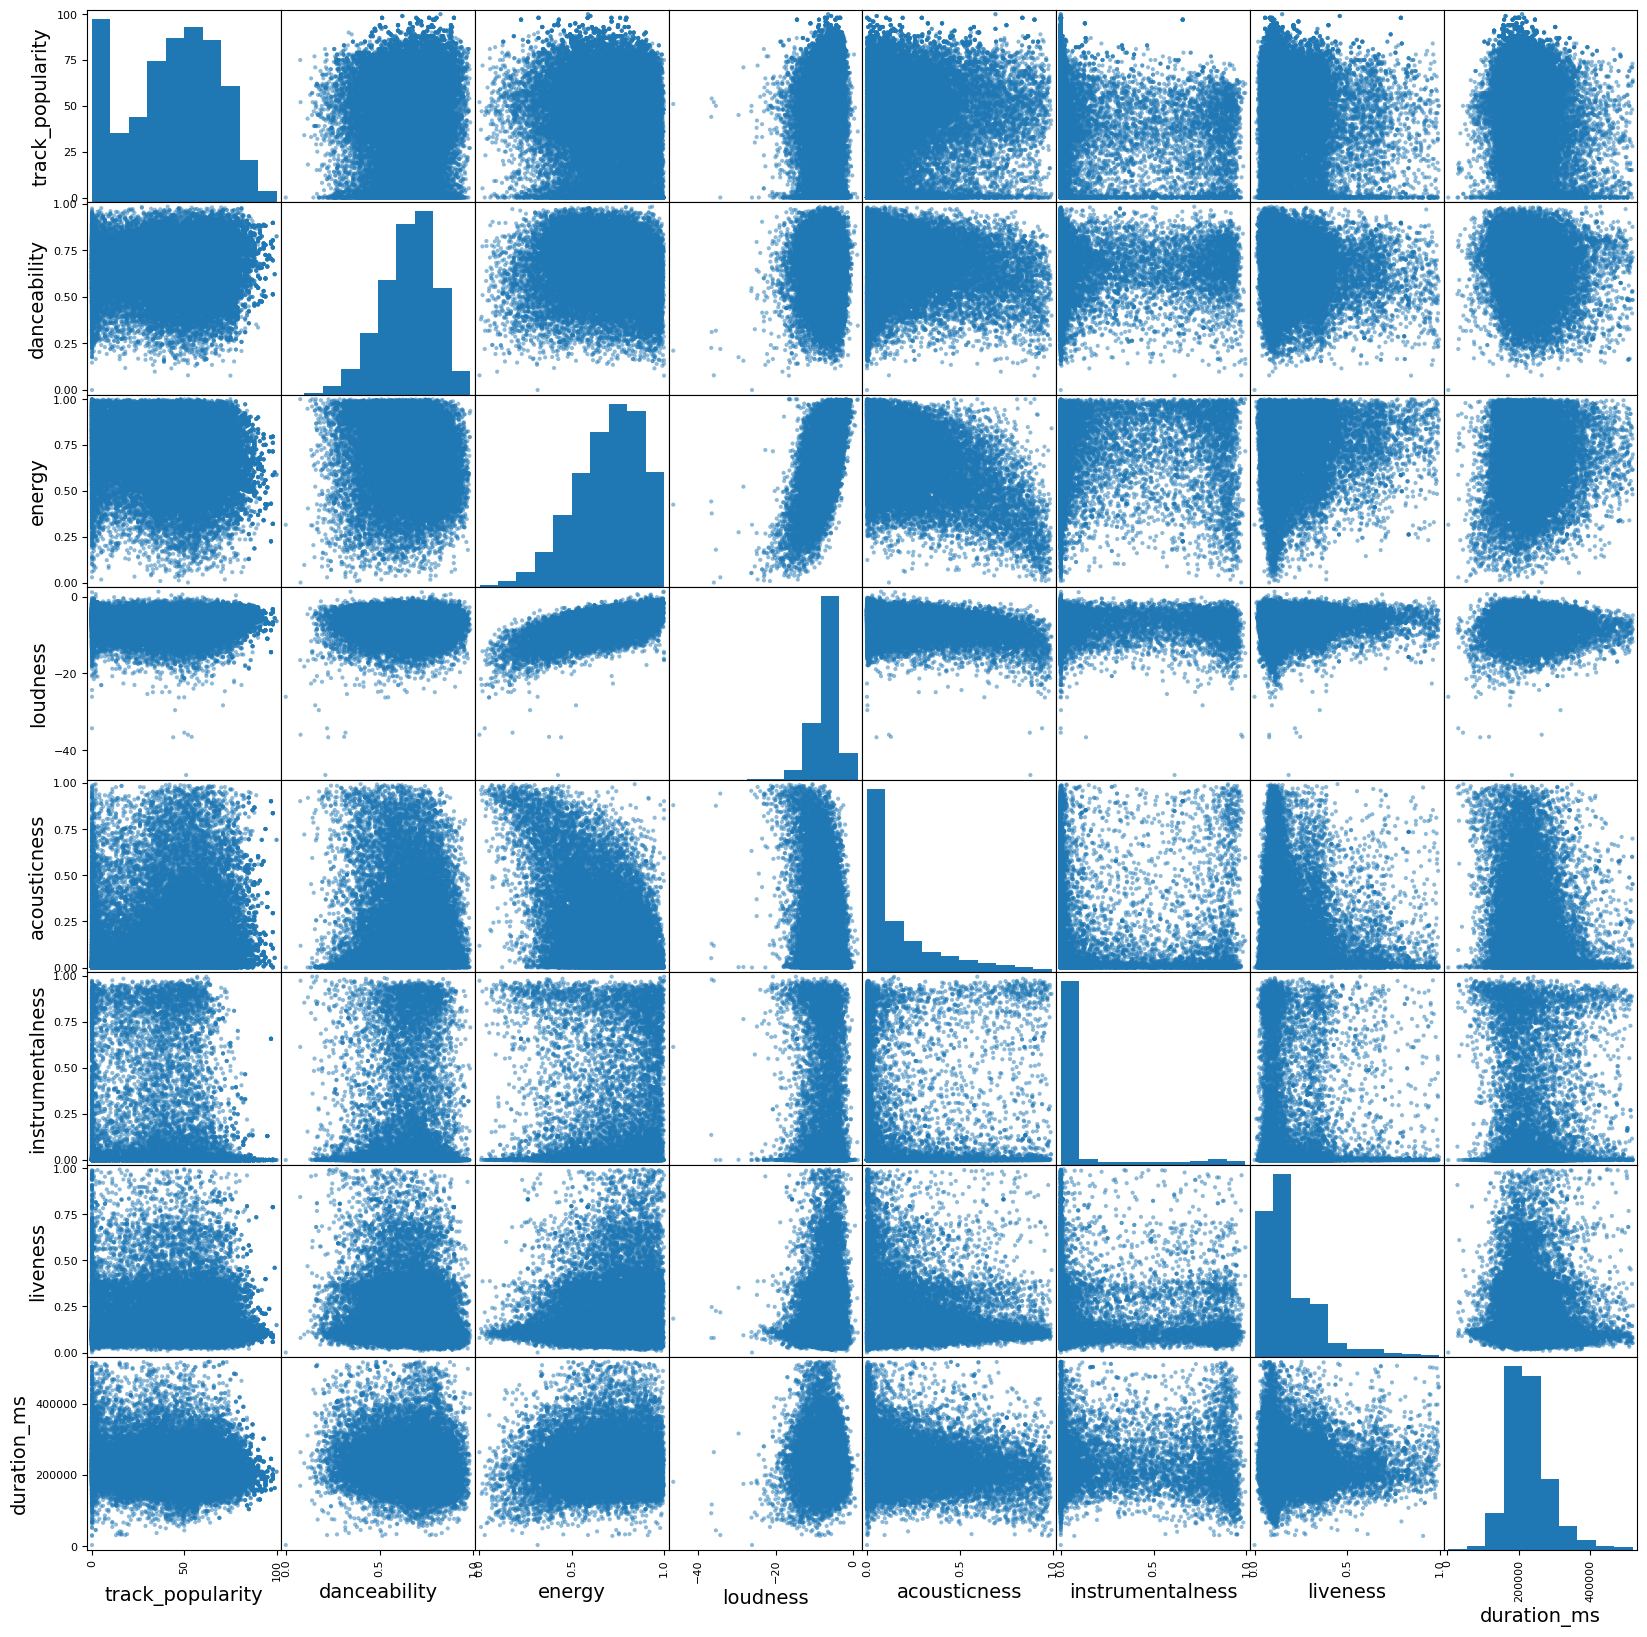

In [142]:
from pandas.plotting import scatter_matrix
attributes = ["track_popularity", "danceability", "energy", "loudness", "acousticness", "instrumentalness", "liveness", "duration_ms"]
scatter_matrix(songs_cp[attributes], figsize=(20, 20))

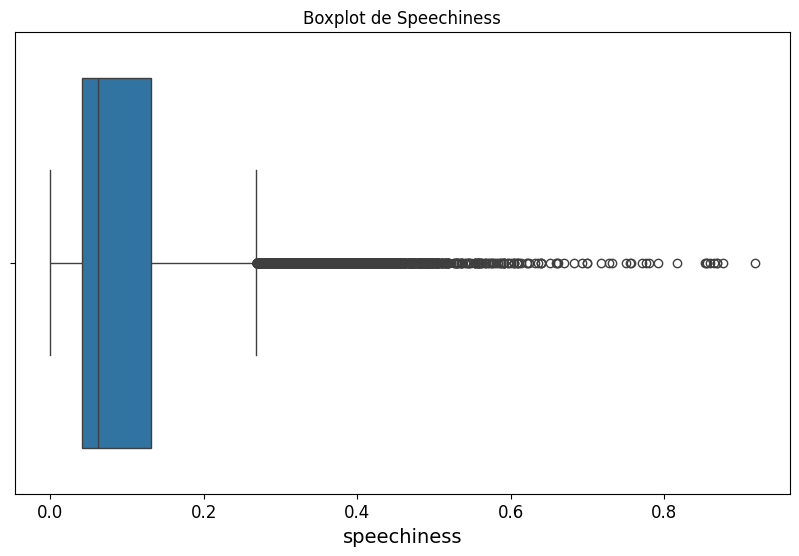

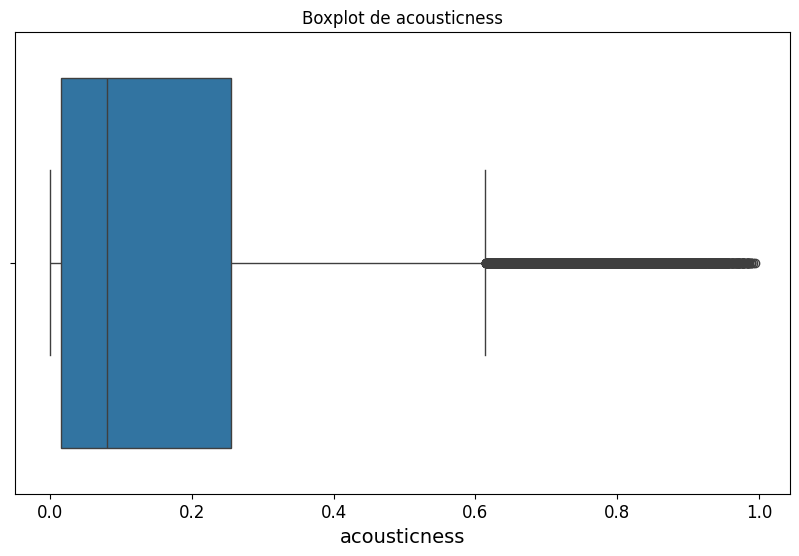

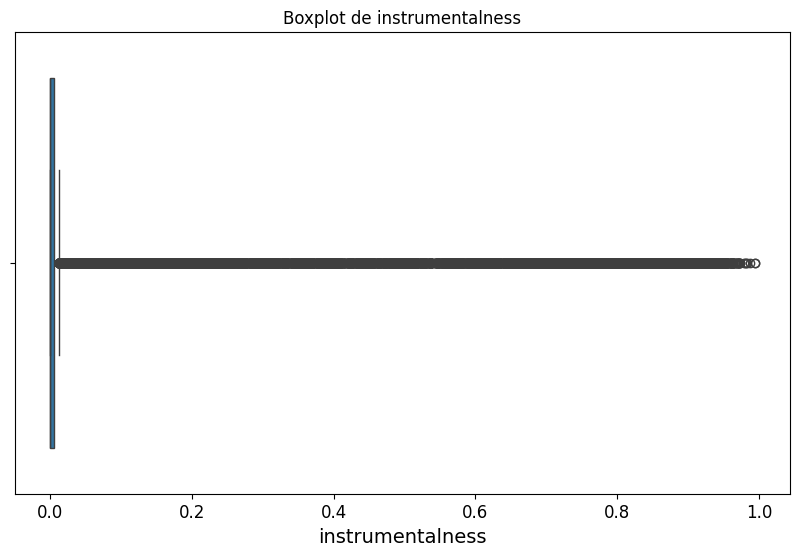

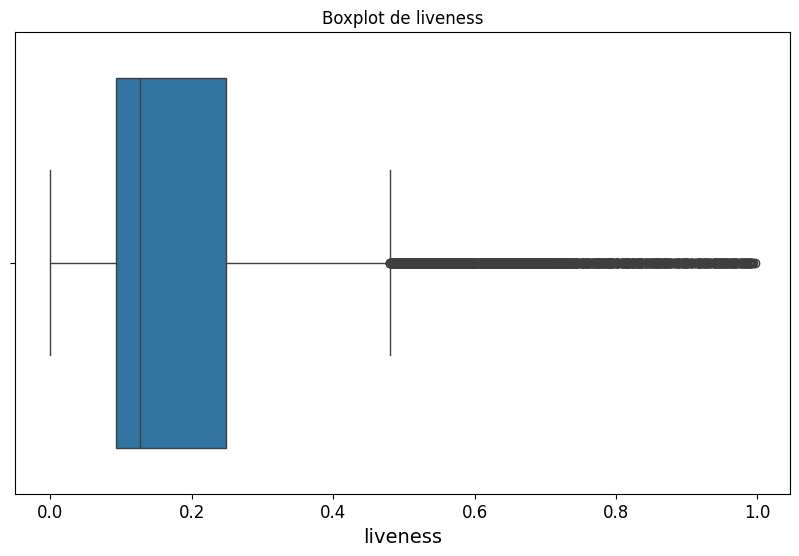

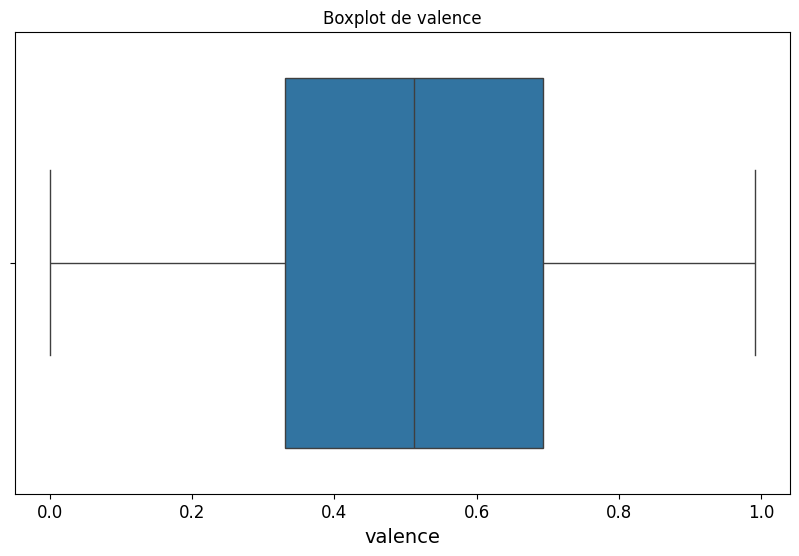

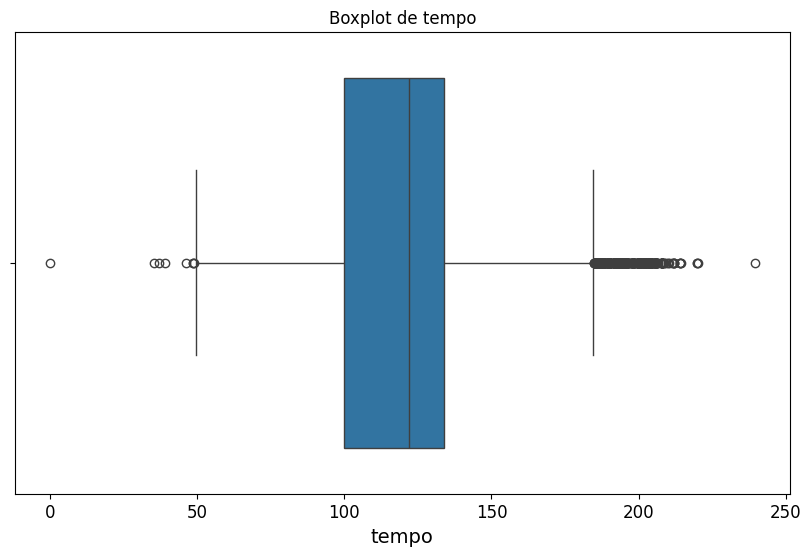

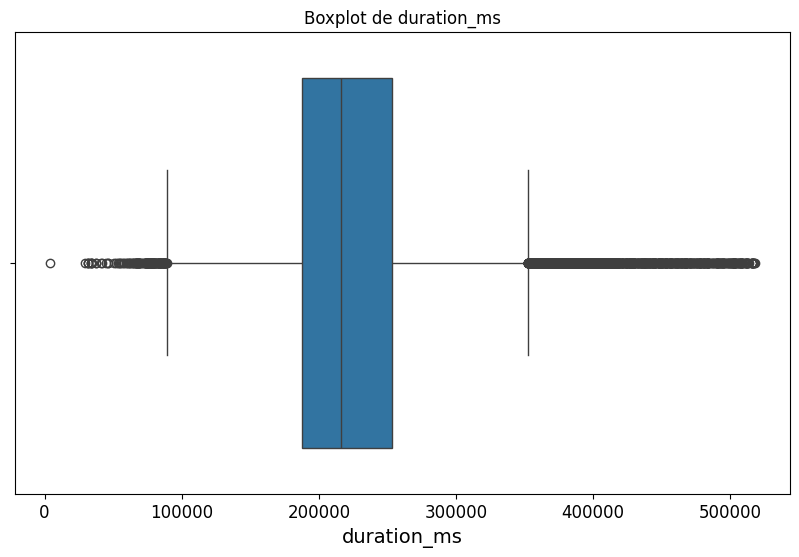

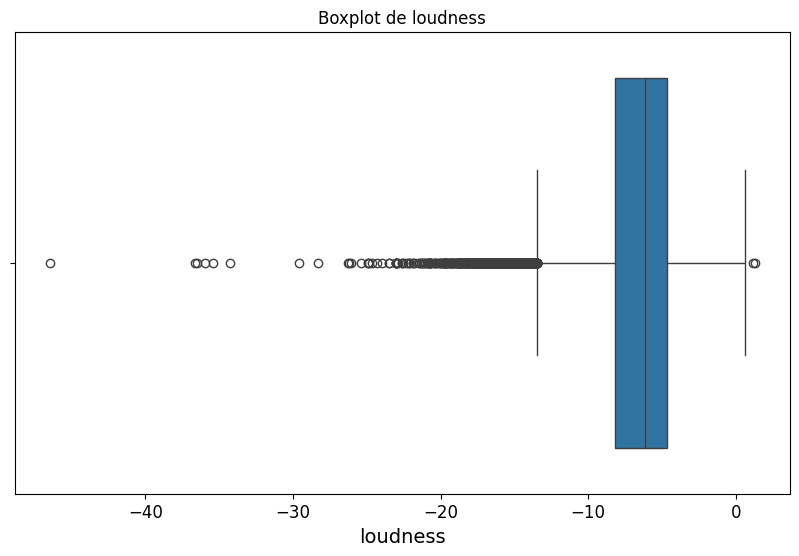

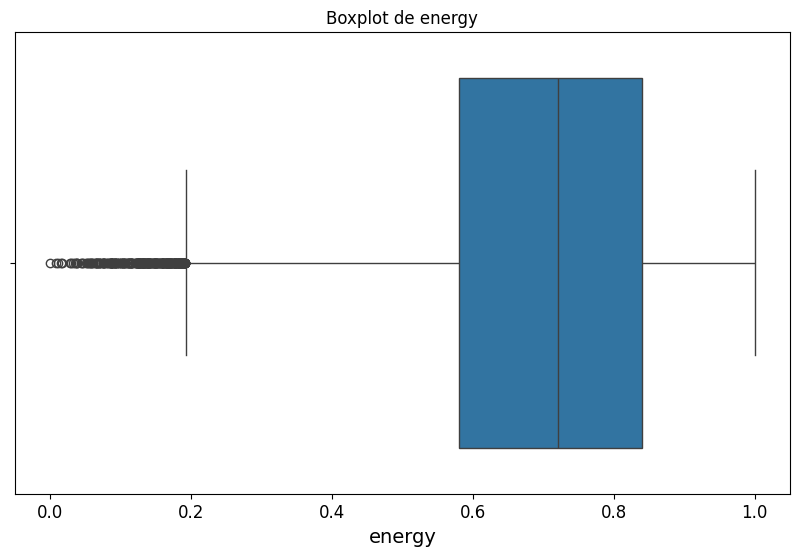

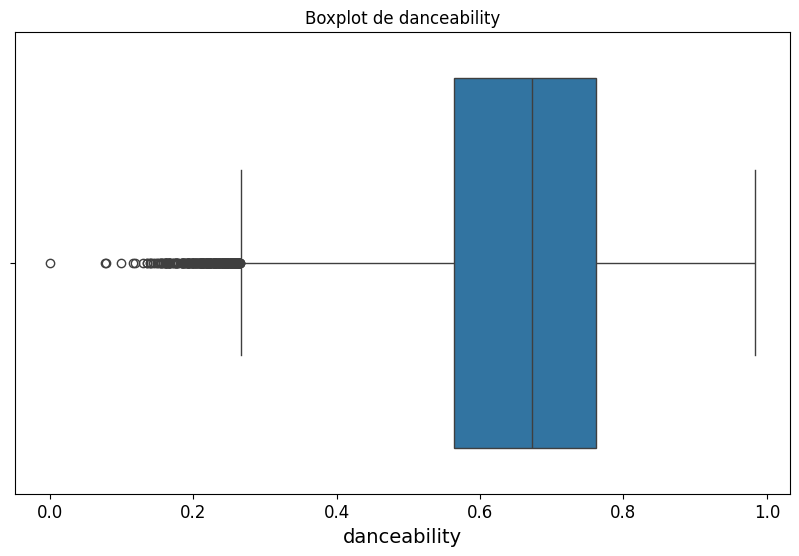

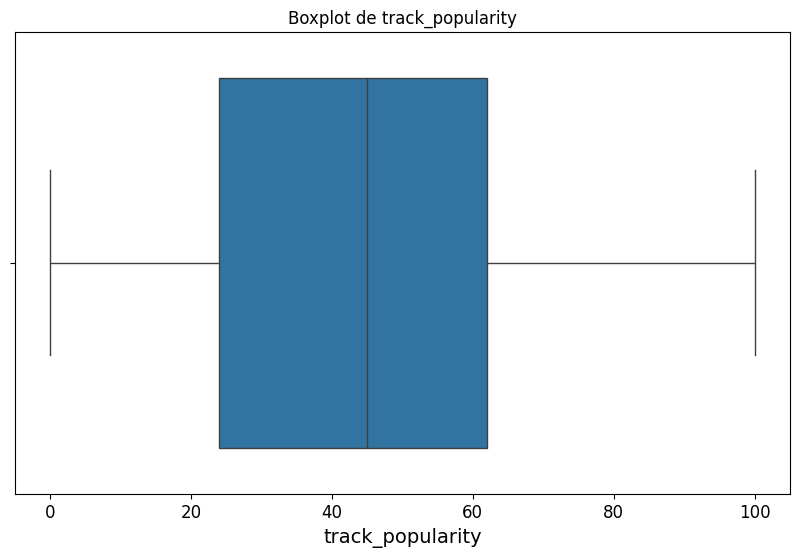

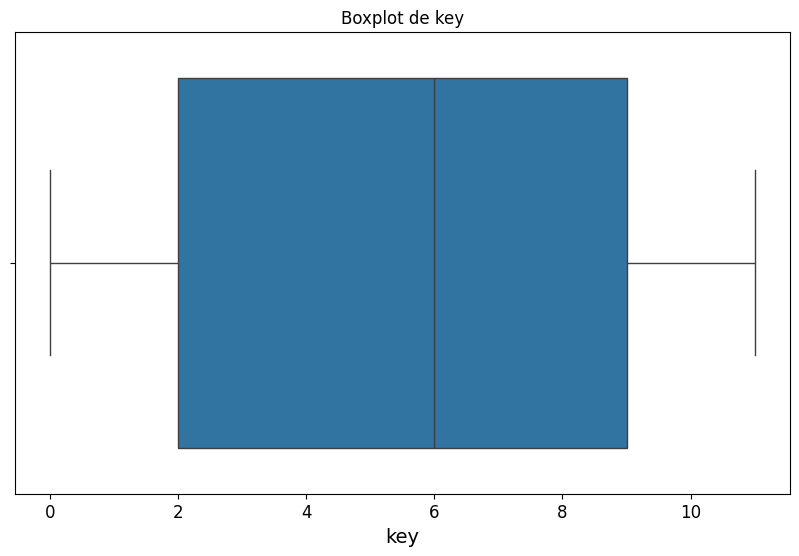

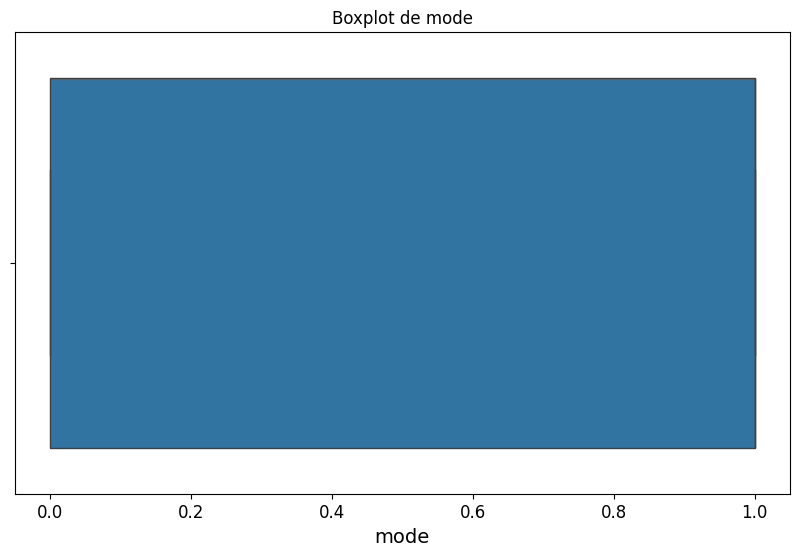

In [143]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=songs['speechiness'])
plt.title('Boxplot de Speechiness')
plt.figure(figsize=(10, 6))
sns.boxplot(x=songs['acousticness'])
plt.title('Boxplot de acousticness')
plt.figure(figsize=(10, 6))
sns.boxplot(x=songs['instrumentalness'])
plt.title('Boxplot de instrumentalness')
plt.figure(figsize=(10, 6))
sns.boxplot(x=songs['liveness'])
plt.title('Boxplot de liveness')
plt.figure(figsize=(10, 6))
sns.boxplot(x=songs['valence'])
plt.title('Boxplot de valence')
plt.figure(figsize=(10, 6))
sns.boxplot(x=songs['tempo'])
plt.title('Boxplot de tempo')
plt.figure(figsize=(10, 6))
sns.boxplot(x=songs['duration_ms'])
plt.title('Boxplot de duration_ms')
plt.figure(figsize=(10, 6))
sns.boxplot(x=songs['loudness'])
plt.title('Boxplot de loudness')
plt.figure(figsize=(10, 6))
sns.boxplot(x=songs['energy'])
plt.title('Boxplot de energy')
plt.figure(figsize=(10, 6))
sns.boxplot(x=songs['danceability'])
plt.title('Boxplot de danceability')
plt.figure(figsize=(10, 6))
sns.boxplot(x=songs['track_popularity'])
plt.title('Boxplot de track_popularity')
plt.figure(figsize=(10, 6))
sns.boxplot(x=songs['key'])
plt.title('Boxplot de key')
plt.figure(figsize=(10, 6))
sns.boxplot(x=songs['mode'])
plt.title('Boxplot de mode')
plt.show()

### Realizando a Limpeza do Dataset

In [ ]:
songs_cp = songs
#removendo as musicas repetidas
print(songs_cp.columns)
songs_cp = removeDuplicates(songs_cp)
print("REMOÇÃO DE DUPPLICADAS")
songs_cp.info()
#removendo colunas
columns_name = ['track_id','track_album_id','playlist_name','playlist_id','playlist_genre','playlist_subgenre']
songs_cp = removeColumns(songs_cp,columns_name)
print("REMOÇÃO DE COLUNAS DESNECESSARIAS PARA O MODELO")
songs_cp.info()
#removendo dados em branco, ja que são dados que não podem ser obtidos usando algum tipo de media,mediana
#entre os dados da coluna, por exemplo: se a musica ta sem o nome do artista, não tem como eu preencher
#o nome desse artista atraves da coluna track_artist
songs_cp = dropRowsEmpty(songs_cp)
print("REMOÇÃO DE LINHAS QUE TENHAM DADOS EM BRANCO")
songs_cp.info()
#normaliza as colunas para que todas fiquem em um intervalo de 0 a 1
columns_name = ['track_popularity','key','mode','tempo','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','duration_ms']
songs_cp = normalizeColumns(songs_cp,columns_name)
print("NORMALIZANDO AS VARIAVEIS NUMERICAS E CATEGORICAS")
songs_cp.info()
#obtendo os n artistas mais populares do dataset
n = 5  # Quantidade de artistas mais populares
songs_cp = onehotTopArtists(songs_cp, n)
print("APLICANDO ONEHOT PARA OS ARTISTAS MAIS RELEVANTES")
songs_cp.info()
#TESTES
#5 musicas mais pupulares
topSongs = getTopSongs(songs_cp,10)
print("TOP MUSICAS")
print(topSongs)

#tranformação de data
preencher_mes_para_ano_unico_inplace(songs_cp)
songs_cp = decompositionDateTransform(songs_cp,'track_album_release_date')

# Lista de artistas desejados
desired_artists = ['Dadá Boladão','Billie Eilish']
# Listas das musicas desses artistas
filtered_songs = songs_cp[songs_cp['track_artist'].isin(desired_artists)][['track_name','track_popularity','track_artist','track_album_name']]
pd.set_option('display.max_rows', None)  # Garante que todas as linhas sejam exibidas
print(filtered_songs)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'track_name_lower'],
      dtype='object')
REMOÇÃO DE DUPPLICATAS
<class 'pandas.core.frame.DataFrame'>
Index: 26161 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  26161 non-null  object 
 1   track_name                26160 non-null  object 
 2   track_artist              26160 non-null  object 
 3   track_popularity          26161 non-null  int64  
 4   track_album_id            26161 non-null  object 
 5   track_album_name          26160 non-null  object